In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

Data Generation
===

In [2]:
np.random.seed(10)
p, q = (np.random.rand(i, 2) for i in (4, 5))
p_big, q_big = (np.random.rand(i, 80) for i in (100, 120))

print(p, "\n\n", q)

[[ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]] 

 [[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]]


Solution
===

In [28]:
def naive(p, q):
    distances = np.zeros((p.shape[0], q.shape[0]))
    for i in range(p.shape[0]):
        for j in range(q.shape[0]):
            distances[i,j] = np.linalg.norm(p[i]-q[j])
    return distances

array([[ 0.60599073,  0.93659449,  0.91124856,  0.59321356,  0.27561751],
       [ 0.80746999,  0.21102354,  0.67268649,  0.22495084,  0.46534491],
       [ 0.35654215,  0.75217493,  0.57200052,  0.49900068,  0.23310825],
       [ 0.67281411,  0.52407472,  0.31520226,  0.63212897,  0.70277376]])

### Use matching indices

Instead of iterating through indices, one can use them directly to parallelize the operations with Numpy.

In [16]:
rows, cols = np.indices((p.shape[0], q.shape[0]))
print(rows, end='\n\n')
print(cols)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]]

[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]


In [17]:
print(p[rows.ravel()], end='\n\n')
print(q[cols.ravel()])

[[ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.77132064  0.02075195]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.63364823  0.74880388]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.49850701  0.22479665]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]
 [ 0.19806286  0.76053071]]

[[ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]
 [ 0.00394827  0.51219226]
 [ 0.81262096  0.61252607]
 [ 0.72175532  0.29187607]
 [ 0.16911084  0.08833981]
 [ 0.68535982  0.95339335]

In [33]:
def with_indices(p, q):
    rows, cols = np.indices((p.shape[0], q.shape[0]))
    flatp = p[rows.ravel()]
    flatq = q[cols.ravel()]
    flatsub = flatp - flatq
    for v in flatsub:
        print(np.linalg.norm(v))
    return np.linalg.norm(flatsub)

with_indices(p,q)

0.60599073488
0.936594489899
0.911248564959
0.593213555481
0.275617505479
0.807469987107
0.211023544898
0.672686486241
0.224950838999
0.465344910288
0.356542153772
0.752174928692
0.572000519565
0.499000678673
0.233108246711
0.672814107554
0.52407472424
0.315202256469
0.632128965882
0.702773761857


2.638645225944444

### Use a library

`scipy` is the equivalent of matlab toolboxes and have a lot to offer. Actually the pairwise computation is part of the library through the `spatial` module.

In [19]:
from scipy.spatial.distance import cdist

def scipy_version(p, q):
    return cdist(p, q)

### Numpy Magic

In [20]:
def tensor_broadcasting(p, q):
    return np.sqrt(np.sum((p[:,np.newaxis,:]-q[np.newaxis,:,:])**2, axis=2))

# Compare methods

In [29]:
methods = [naive, with_indices, scipy_version, tensor_broadcasting]
timers = []
for f in methods:
    r = %timeit -o f(p_big, q_big)
    timers.append(r)

10 loops, best of 3: 124 ms per loop
The slowest run took 6.00 times longer than the fastest. This could mean that an intermediate result is being cached.
10000000 loops, best of 3: 195 ns per loop
1000 loops, best of 3: 980 µs per loop
100 loops, best of 3: 6.54 ms per loop


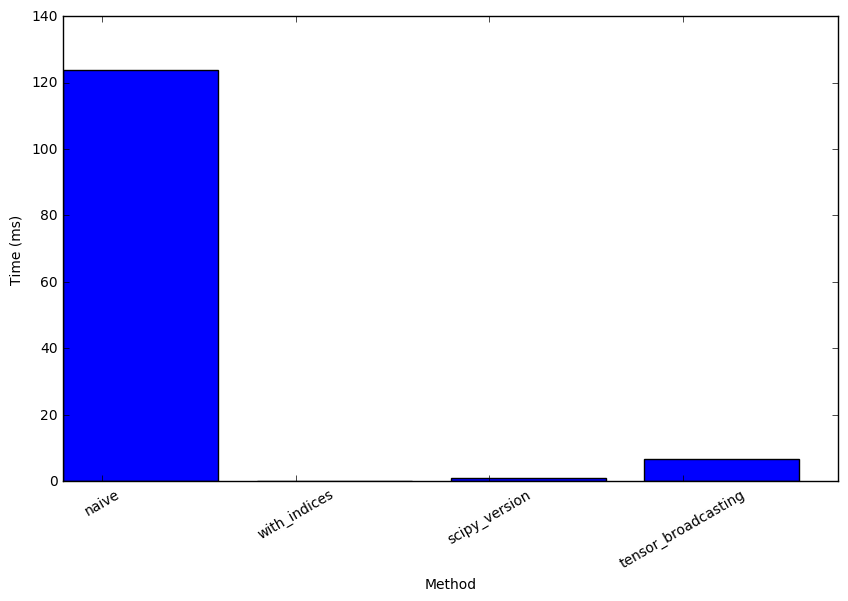

In [30]:
plt.figure(figsize=(10,6))
plt.bar(np.arange(len(methods)), [r.best*1000 for r in timers], log=False)  # Set log to True for logarithmic scale
plt.xticks(np.arange(len(methods))+0.2, [f.__name__ for f in methods], rotation=30)
plt.xlabel('Method')
plt.ylabel('Time (ms)')